## Generating Parameters

In [2]:
using MiCRM

In [4]:
#include("Parameters/crm_parameters.jl")
using Distributions
using LinearAlgebra

In [23]:
N = 10
M = 5
leakage = 0.7

MiCRM.Parameters.generate_params(N, M, λ = leakage)

(N = 10, M = 5, u = [0.19409423260488326 0.3199059680831661 … 0.2065182061423184 0.07693258231564043; 0.3715381709750589 0.12650932777224913 … 0.282288849129167 0.08607284630030945; … ; 0.018748838982714407 0.34980515847923843 … 0.13738595995761982 0.37572030292089786; 0.272698766467491 0.4422843687939894 … 0.218073880559434 0.003590446680092368], m = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], ρ = [1.0, 1.0, 1.0, 1.0, 1.0], ω = [1.0, 1.0, 1.0, 1.0, 1.0], l = [0.05330975917506912 0.013587373655476737 … 0.031925461553716235 0.09971790281145453; 0.26382617783561846 0.2780410966515377 … 0.09488448250079402 0.03898487878449238; … ; 0.19469044418588544 0.13671589915963145 … 0.25140071063765745 0.08977650051104404; 0.07997042477253662 0.3377862439858846 … 0.08588747707278288 0.181497292107271], kw = (λ = 0.7,))

In [24]:
N_clusters = 2 # cluster size
s_ratio = 10 # ???

MiCRM.Parameters.modular_uptake(N,M; N_modules = N_clusters, s_ratio = s_ratio)

10×5 Matrix{Float64}:
 0.555619    0.119542   0.132762     0.123338   0.0687385
 0.808691    0.140495   0.000905378  0.0150743  0.0348342
 0.485143    0.376723   0.0428026    0.037985   0.057346
 0.610546    0.158996   0.0952648    0.0897566  0.045437
 0.0147193   0.857197   0.0238516    0.0751179  0.0291139
 0.00555677  0.054385   0.566152     0.202472   0.171435
 0.0702425   0.0800458  0.392538     0.259675   0.1975
 0.0271673   0.0114043  0.129227     0.397351   0.434851
 0.0203819   0.0337087  0.467534     0.194332   0.284044
 0.0151947   0.0217753  0.274106     0.358632   0.330292

In [25]:
MiCRM.Parameters.modular_leakage(M; N_modules = N_clusters, s_ratio = s_ratio, λ = 0.3)

5×5 Matrix{Float64}:
 0.0694789  0.029919   0.0640449   0.0614196  0.0751376
 0.0107882  0.0700869  0.0744204   0.065557   0.0791475
 0.070458   0.0437001  0.0163528   0.0981053  0.0713838
 0.0123868  0.0121965  0.00669074  0.158862   0.109864
 0.0297132  0.0185063  0.0307646   0.208266   0.0127502

## Simulations

In [26]:
#include("Simulations/dx.jl")

using DifferentialEquations

In [27]:
param = MiCRM.Parameters.generate_params(N, M, λ = leakage);

In [28]:
x0 = ones(N+M)
tspan = (0,100)

prob = ODEProblem(MiCRM.Simulations.dx!, x0, tspan, param);

In [29]:
sol = solve(prob, Tsit5());

In [30]:
sol.u

46-element Vector{Vector{Float64}}:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [0.9387578807471678, 0.9390821276267205, 0.9392054207140138, 0.9389629366433129, 0.9386886473738678, 0.9388895007299691, 0.9387080391413946, 0.9388535394684682, 0.9388386437112676, 0.9391046661592706, 0.9706230372718343, 0.9858259536617265, 0.8787434163530233, 0.9745684549379816, 0.949656757865719]
 [0.8570748445038553, 0.8584820628945534, 0.8589982174730457, 0.8579615922592394, 0.8567869022078606, 0.8576573199126015, 0.8568322184932922, 0.8574835699652225, 0.8574420711370287, 0.8586022630036076, 0.933678056570495, 0.9633960919487311, 0.7669831890713807, 0.9381532406405384, 0.8961749926998326]
 [0.7616669256535367, 0.7647055156345476, 0.7657797715618633, 0.763574770461373, 0.7610727982082361, 0.7629487560807617, 0.7610856021833328, 0.7625348461665532, 0.7624965196136073, 0.7650149872367371, 0.8963135603264465, 0.9366587119949528, 0.6849118931670817, 0.8986893724160286, 0.84

## Plotting the dynamics

In [31]:
using Plots

In [32]:
t = sol.t;
size(t)

(46,)

In [33]:
results = sol.u;
size(results)

(46,)

In [34]:
C = reduce(hcat,results)'[:,1:N]; # make C a matrix for plotting
# reduce(op, itr; [init]) Reduce the given collection itr with the given binary operator op
size(C)

(46, 10)

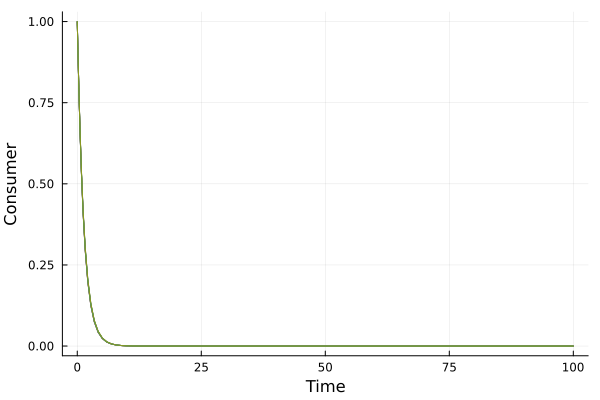

In [35]:
plot(t, C, xaxis = "Time", yaxis = "Consumer", legend=false)

In [36]:
R = reduce(hcat,results)'[:,N+1:N+M];
size(R)

(46, 5)

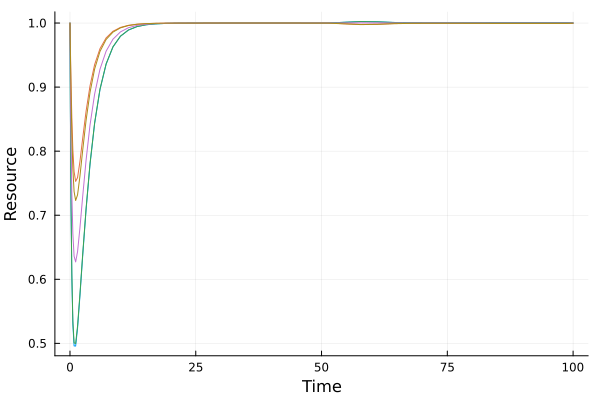

In [22]:
plot(t, R, xaxis = "Time", yaxis = "Resource", legend = false)